In [12]:
import random
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [13]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [14]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,1.243140,-1.364495,0.946341,1.182226,-0.598477,1
1,0.654603,0.332810,1.743762,1.787215,-1.223550,1
2,-2.256264,0.428768,1.188890,1.409361,-3.537331,0
3,0.142614,-1.038749,0.745807,3.095639,-1.816363,1
4,-1.380901,0.581687,1.434620,-0.337059,1.435127,0


In [15]:
def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)
     

In [16]:
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [17]:
def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [18]:
df1 = combined_sampling(df,0.5,0.5)

C:\Users\U.S\AppData\Local\Temp\ipykernel_1492\1824989938.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [19]:
df2 = combined_sampling(df,0.5,0.5)

C:\Users\U.S\AppData\Local\Temp\ipykernel_1492\1824989938.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [20]:
df3 = combined_sampling(df,0.5,0.5)

C:\Users\U.S\AppData\Local\Temp\ipykernel_1492\1824989938.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [21]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col2', 'col1', 'target'], dtype='object')
Index(['col5', 'col1', 'target'], dtype='object')
Index(['col2', 'col1', 'target'], dtype='object')


In [22]:
df3

,col2,col1,target
60,0.465391,-2.438980,0
33,1.595218,0.234036,0
7,1.074805,-0.861510,0
15,-1.958107,0.449802,1
23,-2.586088,-0.525329,1
52,-0.382346,-3.701542,0
90,-0.014492,1.525109,1
8,-0.755839,-4.477511,0
45,-1.225977,1.748991,1
1,0.332810,0.654603,1


In [23]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [24]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

In [25]:
from sklearn.tree import plot_tree

[Text(0.4444444444444444, 0.875, 'x[0] <= 0.104\ngini = 0.5\nsamples = 50\nvalue = [25, 25]'),
 Text(0.2222222222222222, 0.625, 'x[1] <= -1.332\ngini = 0.269\nsamples = 25\nvalue = [4, 21]'),
 Text(0.1111111111111111, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 21\nvalue = [0, 21]'),
 Text(0.6666666666666666, 0.625, 'x[1] <= 1.616\ngini = 0.269\nsamples = 25\nvalue = [21, 4]'),
 Text(0.5555555555555556, 0.375, 'gini = 0.0\nsamples = 17\nvalue = [17, 0]'),
 Text(0.7777777777777778, 0.375, 'x[0] <= 2.515\ngini = 0.5\nsamples = 8\nvalue = [4, 4]'),
 Text(0.6666666666666666, 0.125, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.8888888888888888, 0.125, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

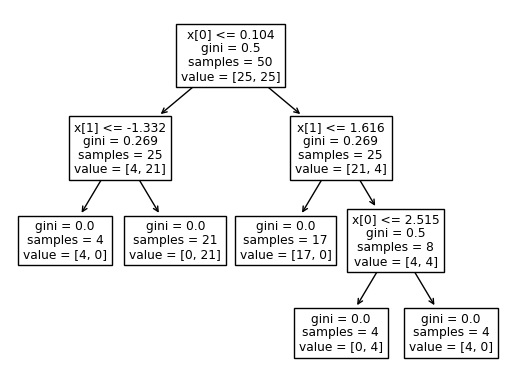

In [26]:
plot_tree(clf1)

[Text(0.42857142857142855, 0.9285714285714286, 'x[1] <= -0.692\ngini = 0.42\nsamples = 50\nvalue = [35, 15]'),
 Text(0.21428571428571427, 0.7857142857142857, 'x[0] <= -1.904\ngini = 0.091\nsamples = 21\nvalue = [20, 1]'),
 Text(0.14285714285714285, 0.6428571428571429, 'x[1] <= -1.798\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.07142857142857142, 0.5, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.21428571428571427, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.2857142857142857, 0.6428571428571429, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(0.6428571428571429, 0.7857142857142857, 'x[0] <= -0.567\ngini = 0.499\nsamples = 29\nvalue = [15.0, 14.0]'),
 Text(0.42857142857142855, 0.6428571428571429, 'x[0] <= -1.708\ngini = 0.455\nsamples = 20\nvalue = [7, 13]'),
 Text(0.35714285714285715, 0.5, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.5, 0.5, 'x[1] <= 2.146\ngini = 0.231\nsamples = 15\nvalue = [2, 13]'),
 Text(0.42857142857142855, 0.357142857142857

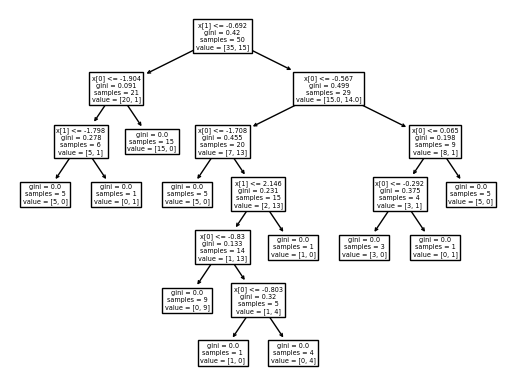

In [27]:
plot_tree(clf2)

[Text(0.4, 0.9, 'x[1] <= -0.57\ngini = 0.493\nsamples = 50\nvalue = [28.0, 22.0]'),
 Text(0.2, 0.7, 'x[0] <= -1.788\ngini = 0.095\nsamples = 20\nvalue = [19, 1]'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3, 0.5, 'gini = 0.0\nsamples = 19\nvalue = [19, 0]'),
 Text(0.6, 0.7, 'x[0] <= 1.236\ngini = 0.42\nsamples = 30\nvalue = [9, 21]'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 20\nvalue = [0, 20]'),
 Text(0.7, 0.5, 'x[1] <= 2.973\ngini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.8, 0.3, 'x[0] <= 2.837\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.9, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

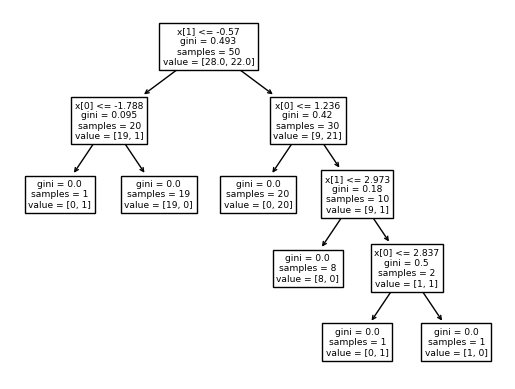

In [28]:
plot_tree(clf3)

In [29]:
clf1.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [32]:
clf2.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [33]:
clf3.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [34]:
df.sample(14,replace=True)

,col1,col2,col3,col4,col5,target
96,0.865417,2.111426,1.013138,2.877468,-2.698790,0
17,1.082488,-0.070255,1.620365,2.478373,-1.918613,1
64,0.188646,1.760183,-0.124496,1.565848,-0.450134,0
41,-1.370520,0.934885,0.260342,-0.472384,0.964634,0
16,0.245295,-1.503587,0.641408,2.972144,-1.192397,1
48,-2.406229,-0.106859,2.817563,-0.001812,-0.278424,0
79,1.208451,-0.927574,0.597752,0.385009,-0.789635,1
58,2.749823,0.081453,1.614932,1.092392,-1.813740,1
72,0.147131,1.681750,0.322278,1.964124,-1.505306,0
5,2.381425,0.009351,1.654617,0.776592,-1.097442,1
